In [14]:
import numpy as np  
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy.optimize import curve_fit
import seaborn as sns
%matplotlib inline

In [15]:
f = open("Gallium.dat", "r")
T_sq = []
C_T = []
for lines in f:
    if lines[0] == "#":
        continue
    x = str.split(lines)
    T_sq.append(float(x[0]))
    C_T.append(float(x[1]))

f.close()


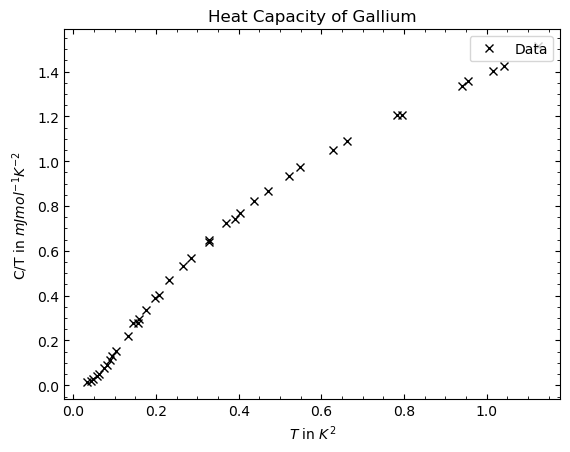

In [16]:
heat_capacity = np.array(C_T)
temperature = np.array(T_sq)

plt.plot(temperature, heat_capacity, "x", color="black", label="Data")
plt.xlabel("$T$ in $K^{2}$")
plt.ylabel("C/T in $mJ mol^{-1} K^{-2}$")
plt.legend(loc="upper right")
plt.title("Heat Capacity of Gallium")

plt.gca().tick_params(which="both", direction="in", right=True, top=True)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')

In [27]:
def f(x, a, b):
    return a + b*x

popt, pcov = curve_fit(f, temperature, heat_capacity)
gamma = popt[0]
beta = popt[1]
print(f"Sommerfield constant = ", popt[0])
print(f"Slope = ", popt[1])

Sommerfield constant =  0.07077220994707936
Slope =  1.4272051229908012
